In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GaussianNoise, BatchNormalization
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from PIL import Image
from IPython.display import display


In [2]:
train_dataset_path = '14825193/images_separada/train'
test_dataset_path =  '14825193/images_separada/test'

In [3]:
IMG_WIDTH = 300
IMG_HEIGHT = 300
BATCH_SIZE = 32

In [4]:
def obtener_imagenes_y_clases(ruta_directorio):
    imagenes = []
    clases = []

    for clase in os.listdir(ruta_directorio):
        ruta_clase = os.path.join(ruta_directorio, clase)

        if os.path.isdir(ruta_clase):
            for imagen in os.listdir(ruta_clase):
                ruta_imagen = os.path.join(ruta_clase, imagen)

                try:
                    with Image.open(ruta_imagen) as img:
                        img_resized = img.resize((IMG_WIDTH,IMG_HEIGHT)).convert('I')  # Redimensionar la imagen
                        imagenes.append(np.array(img_resized.copy()))  # Convertir imagen redimensionada a arreglo NumPy
                    clases.append(clase)
                except Exception as e:
                    print(f"Error al abrir la imagen {ruta_imagen}: {str(e)}")

    return imagenes, clases

In [5]:
train_images, train_labels =obtener_imagenes_y_clases(train_dataset_path)
test_images, test_labels = obtener_imagenes_y_clases(test_dataset_path)

In [6]:
def normalize_images(images):
    normalized_images = []
    for image in images:
        normalized_image = image / np.max(image)
        normalized_images.append(normalized_image)
    return normalized_images

In [7]:
# Normalizar las imágenes del conjunto de prueba
train_images_normalized = normalize_images(train_images)

# Normalizar las imágenes del conjunto de prueba
test_images_normalized = normalize_images(test_images)

# Convertir las listas de imágenes y etiquetas a arreglos NumPy
train_images_normalized = np.array(train_images_normalized)
train_labels=[1 if label == 'fracturado' else 0 for label in train_labels]
train_labels = np.array(train_labels)
test_images_normalized = np.array(test_images_normalized)
test_labels=[1 if label == 'fracturado_test' else 0 for label in test_labels]
test_labels = np.array(test_labels)


In [8]:
train_images[0]

array([[59948, 59835, 60299, ...,  -949,  -929,  -273],
       [59772, 59711, 59986, ...,  6478,  6285,  1833],
       [60250, 60184, 59877, ..., 42783, 42755, 12833],
       ...,
       [    0,     0,     0, ..., 42577, 48902, 41628],
       [    0,     0,     0, ..., 46856, 51772, 43452],
       [    0,     0,     0, ..., 50850, 54725, 45870]])

In [9]:
train_images_normalized[0]

array([[ 0.90531275,  0.90360627,  0.91061343, ..., -0.01433145,
        -0.01402942, -0.00412275],
       [ 0.90265487,  0.90173367,  0.90588662, ...,  0.09782839,
         0.09491377,  0.0276813 ],
       [ 0.90987345,  0.90887674,  0.90424054, ...,  0.64609321,
         0.64567036,  0.19379927],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.64298227,
         0.73850011,  0.62865082],
       [ 0.        ,  0.        ,  0.        , ...,  0.70760216,
         0.7818418 ,  0.6561962 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.76791809,
         0.82643692,  0.69271195]])

In [10]:
test_labels

array([1, 1, 1, ..., 0, 0, 0])

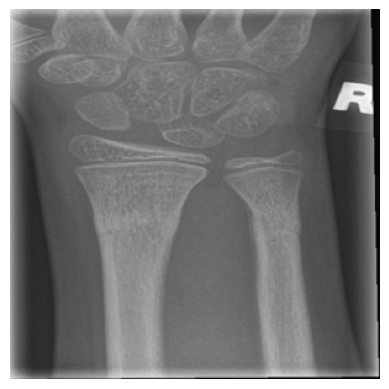

In [11]:

plt.imshow(train_images[5], cmap='gray')
plt.axis('off')  # Para ocultar los ejes
plt.show()

In [12]:
# Verificar las dimensiones de los arreglos
print("Dimensiones del conjunto de entrenamiento:")
print("Imágenes:", train_images_normalized.shape)
print("Etiquetas:", train_labels.shape)
print()
print("Dimensiones del conjunto de prueba:")
print("Imágenes:", test_images_normalized.shape)
print("Etiquetas:", test_labels.shape)

Dimensiones del conjunto de entrenamiento:
Imágenes: (9684, 300, 300)
Etiquetas: (9684,)

Dimensiones del conjunto de prueba:
Imágenes: (2398, 300, 300)
Etiquetas: (2398,)


In [13]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

model = Sequential()
model.add(Conv2D(3, (1, 1), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)))
model.add(base_model)
model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))          
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(train_images_normalized,train_labels,validation_data=(test_images_normalized,test_labels), epochs=10, batch_size=50,  verbose=1)


Epoch 1/10
194/194 [==============================] - 1349s 7s/step - loss: 0.6917 - accuracy: 0.5810 - val_loss: 0.7160 - val_accuracy: 0.5788
Epoch 2/10
194/194 [==============================] - 1284s 7s/step - loss: 0.3874 - accuracy: 0.8416 - val_loss: 8.2913 - val_accuracy: 0.5475
Epoch 3/10
194/194 [==============================] - 1281s 7s/step - loss: 0.2677 - accuracy: 0.9034 - val_loss: 0.2463 - val_accuracy: 0.9133
Epoch 4/10
194/194 [==============================] - 1285s 7s/step - loss: 0.2171 - accuracy: 0.9251 - val_loss: 0.2544 - val_accuracy: 0.9170
Epoch 5/10
194/194 [==============================] - 1280s 7s/step - loss: 0.1895 - accuracy: 0.9333 - val_loss: 0.2220 - val_accuracy: 0.9195
Epoch 6/10
194/194 [==============================] - 1225s 6s/step - loss: 0.1659 - accuracy: 0.9421 - val_loss: 0.2912 - val_accuracy: 0.8728
Epoch 7/10
194/194 [==============================] - 883s 5s/step - loss: 0.1460 - accuracy: 0.9500 - val_loss: 0.2445 - val_accuracy: 

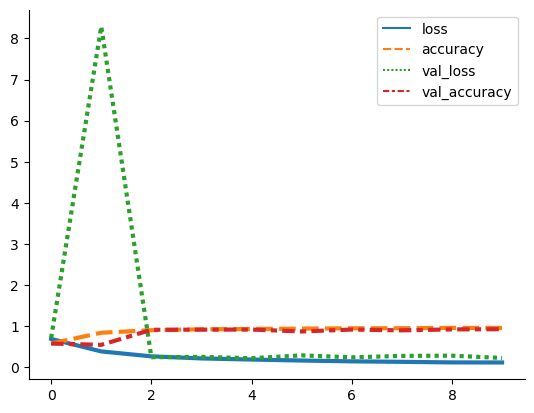

In [15]:
loss = pd.DataFrame(model.history.history)
plt.Figure(figsize=(12,12))
sns.lineplot(data=loss,lw=3)
sns.despine()


In [16]:
predictions_test = model.predict((test_images_normalized))
threshold = 0.5
preds_binary_test = np.where(predictions_test >= threshold, 1, 0)

75/75 [==============================] - 39s 519ms/step


In [17]:
y_pred_test = preds_binary_test
print(y_pred_test)
y_true_test = test_labels

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


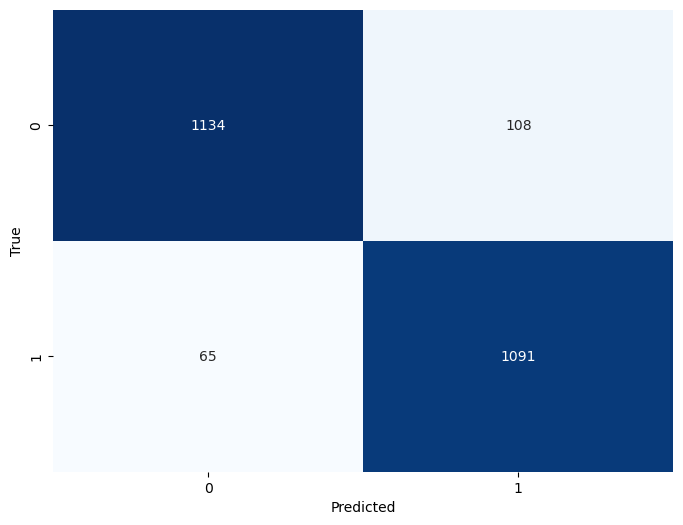

In [18]:
cf_mtx = confusion_matrix(y_pred_test, y_true_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_mtx, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [19]:
print(classification_report(y_pred_test, y_true_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1242
           1       0.91      0.94      0.93      1156

    accuracy                           0.93      2398
   macro avg       0.93      0.93      0.93      2398
weighted avg       0.93      0.93      0.93      2398



In [20]:
predictions_train = model.predict((train_images_normalized))
threshold = 0.5
preds_binary_train = np.where(predictions_train >= threshold, 1, 0)

303/303 [==============================] - 157s 517ms/step


In [21]:
y_pred_train = preds_binary_train
print(y_pred_train)
y_true_train = train_labels

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]


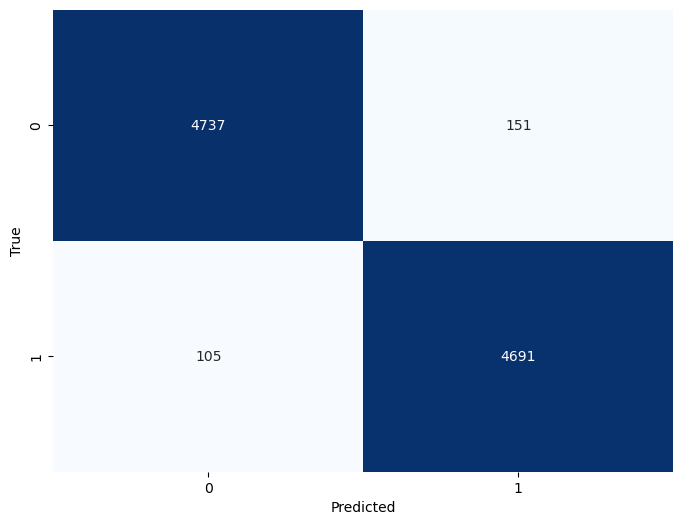

In [22]:
cf_mtx = confusion_matrix(y_pred_train, y_true_train)

plt.figure(figsize=(8, 6))
sns.heatmap(cf_mtx, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [23]:
print(classification_report(y_pred_train, y_true_train))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4888
           1       0.97      0.98      0.97      4796

    accuracy                           0.97      9684
   macro avg       0.97      0.97      0.97      9684
weighted avg       0.97      0.97      0.97      9684



In [24]:
model.save('modeloCNNInception.h5')

C:\Users\PC\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
modelo_cargado = tf.keras.models.load_model('modeloCNNInception.h5', compile=True)


In [26]:
def normalize_images_test(images):
    normalized_images = []
    for image in images:
        normalized_image = image / np.max(image)
        normalized_images.append(normalized_image)
    return normalized_images

1/1 [==============================] - 0s 48ms/step
[[0.08820258]]
1/1 [==============================] - 0s 58ms/step
[['No Fracturado']]


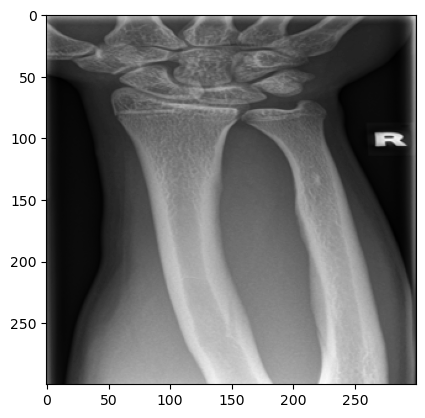

In [33]:
# png-transparent-x-ray-bone-fracture-distal-radius-fracture-shoulder-arm-arm-hand-people-medical.png -fractura
# fractura-mano.jpg -fractura
# serv_rxcm.jpg  -no fractura
# radio-mano.jpg -no fractura
# 2-fractura-diafisaria-femur-radiografia.jpg -fractura
# Fracturada.png  -fractura
# no fracturada.png -no fractura

dir='no fracturada.png'

#print(np.array(Image.open(dir).convert('I')))
imagen1=[]
imagen1.append(np.array(Image.open(dir).convert('I').resize((300,300)).copy()))
#print(imagen1[0])
imagen1normalized=normalize_images_test(imagen1)
plt.imshow(imagen1normalized[0],cmap='gray')
print(modelo_cargado.predict(np.array(imagen1normalized)))
print(np.where(modelo_cargado.predict(np.array(imagen1normalized)) >= 0.5, 'Fracturado','No Fracturado'))